In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:11<00:00, 96.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [2]:
import os

base_path = path
for root, dirs, files in os.walk(base_path):
    print("Current directory:", root)
    print("Sub-directories:", dirs)
    print("Files:", files[:5])  # show only first 5 files for brevity
    print("=" * 40)

Current directory: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1
Sub-directories: ['train', 'dogs_vs_cats', 'test']
Files: []
Current directory: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train
Sub-directories: ['cats', 'dogs']
Files: []
Current directory: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats
Sub-directories: []
Files: ['cat.12330.jpg', 'cat.2975.jpg', 'cat.3738.jpg', 'cat.9710.jpg', 'cat.6168.jpg']
Current directory: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/dogs
Sub-directories: []
Files: ['dog.8085.jpg', 'dog.6857.jpg', 'dog.7285.jpg', 'dog.10791.jpg', 'dog.8113.jpg']
Current directory: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats
Sub-directories: ['train', 'test']
Files: []
Current directory: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats/train
Sub-directories: ['cats', 'dogs']
Files: []
Current directory: /root/.cach

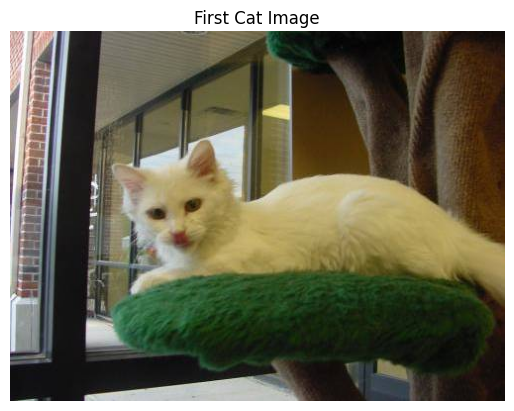

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the full path to the first cat image
cat_image_path =path+"/train/cats/cat.891.jpg"

# Load and display the image
img = Image.open(cat_image_path)
plt.imshow(img)
plt.axis('off')
plt.title("First Cat Image")
plt.show()


In [4]:

import os

cat_image_path = path+"/train/cats"
print("Exists:", os.path.exists(cat_image_path))


Exists: True


In [5]:
import os

cat_dir = path+"/train/cats"

# Check if directory exists
print("Exists:", os.path.exists(cat_dir))

# Get list of all image filenames
cat_filenames = sorted([f for f in os.listdir(cat_dir) if f.endswith(".jpg")])
print(f"Total cat test images: {len(cat_filenames)}")
print("First 5 files:", cat_filenames[:5])


Exists: True
Total cat test images: 10000
First 5 files: ['cat.0.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10002.jpg']


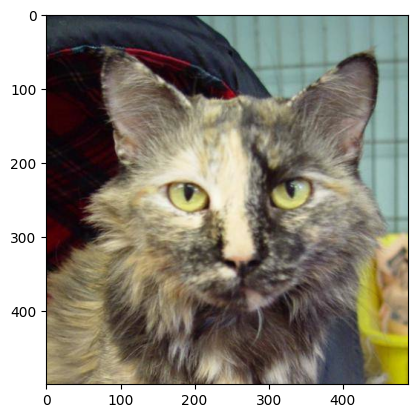

In [6]:

cat_image_path = path+"/test/cats/cat.10.jpg"

# Load and display the image
img = Image.open(cat_image_path)
plt.imshow(img)

In [7]:
import os

dog_dir =path+"/test/dogs"

# Check if directory exists
print("Exists:", os.path.exists(dog_dir))

# Get list of all image filenames
cat_filenames = sorted([f for f in os.listdir(dog_dir) if f.endswith(".jpg")])
print(f"Total cat test images: {len(cat_filenames)}")
print("First 5 files:", cat_filenames[:5])


Exists: True
Total cat test images: 2500
First 5 files: ['dog.100.jpg', 'dog.10006.jpg', 'dog.10010.jpg', 'dog.10014.jpg', 'dog.10017.jpg']


In [8]:
import os
import cv2

Images = []
Labels = []

# Paths to cat and dog image directories
cat_dir =path+"/test/cats"
dog_dir = path+"/test/dogs"

# Load cat images (label 0)
for file in os.listdir(cat_dir):
    img_path = os.path.join(cat_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(0)

# Load dog images (label 1)
for file in os.listdir(dog_dir):
    img_path = os.path.join(dog_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(1)

print(f"Total Images Loaded: {len(Images)}")
print(f"Total Labels: {len(Labels)}")
print(f"Example label values: {Labels[:10]}")


Total Images Loaded: 5000
Total Labels: 5000
Example label values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Postive')

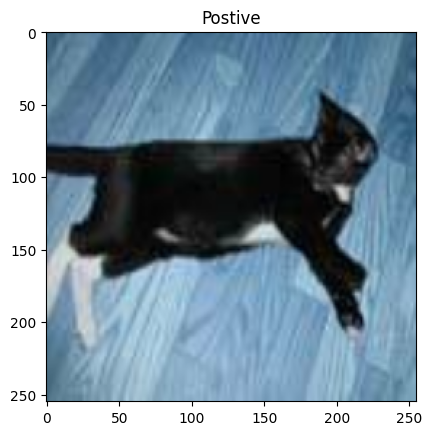

In [9]:
sample = Images[0]

plt.imshow(sample)
plt.title("Postive")

In [10]:
len(Images)

5000

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 255, 246],
        [254, 255, 247],
        [254, 255, 252],
        ...,
        [255, 251, 255],
        [255, 252, 255],
        [255, 255, 255]],

       [[254, 255, 246],
        [254, 255, 249],
        [254, 255, 252],
        ...,
        [255, 251, 255],
        [255, 253, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
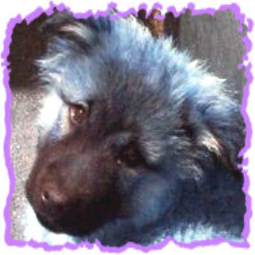

In [11]:
Images[2600]

In [12]:
Labels[2600]

1

In [13]:
import numpy as np

# Convert lists to NumPy arrays
X = np.array(Images, dtype=np.float32)
y = np.array(Labels)

# Now safely scale
X = X / 255.0


In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, np.array(y), stratify = np.array(y),
                                                    random_state = 42,
                                                    shuffle = True, test_size = 0.2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((4000, 255, 255, 3), (1000, 255, 255, 3), (4000,), (1000,))

In [15]:
from sklearn.linear_model import LogisticRegression

train_X_flattened = train_X.reshape(len(train_X), -1)
test_X_flattened = test_X.reshape(len(test_X), -1)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
def get_score(y_pred, y_true):
    print("Accuracy score - ", accuracy_score(y_pred, y_true))
    print("Precision score - ", precision_score(y_pred, y_true))
    print("Recall score - ", recall_score(y_pred, y_true))
    print("f1 score - ", f1_score(y_pred, y_true))
    print("----------  Classification Report   -------")
    print(classification_report(y_pred, y_true))

    matrix = confusion_matrix(y_pred, y_true)
    sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d')

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X_flattened, train_y)

KNeighborsClassifier()

In [ ]:
get_score(knn.predict(test_X_flattened), test_y)


In [ ]:
import joblib
joblib.dump(knn, 'KNN_model.pkl')

In [ ]:
from google.colab import files
files.download("KNN_model.pkl")

In [21]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Flatten the 255x255x3 images into 1D
train_X_flattened = train_X.reshape(train_X.shape[0], -1)
test_X_flattened = test_X.reshape(test_X.shape[0], -1)

print("Flattened train shape:", train_X_flattened.shape)
print("Flattened test shape:", test_X_flattened.shape)


Flattened train shape: (4000, 195075)
Flattened test shape: (1000, 195075)


Accuracy score -  0.595
Precision score -  0.654
Recall score -  0.5849731663685152
f1 score -  0.6175637393767706
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       441
           1       0.65      0.58      0.62       559

    accuracy                           0.59      1000
   macro avg       0.59      0.60      0.59      1000
weighted avg       0.60      0.59      0.60      1000



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

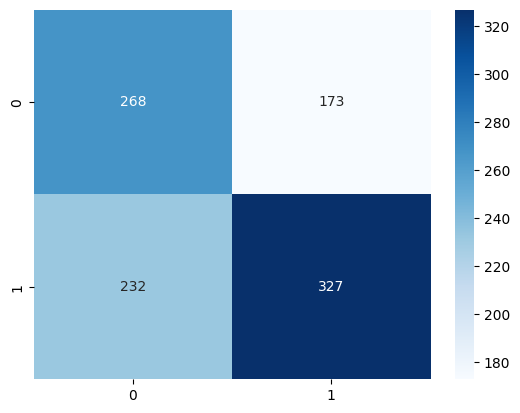

In [23]:
gnb = GaussianNB()
gnb.fit(train_X_flattened, train_y)
get_score(gnb.predict(test_X_flattened), test_y)

# Save and download
import joblib
joblib.dump(gnb, 'GaussianNB_model.pkl')
from google.colab import files
files.download('GaussianNB_model.pkl')


In [ ]:
#MultinomialNB
# Try using X * 255 and cast to int
train_X_int = (train_X_flattened * 255).astype(np.int32)
test_X_int = (test_X_flattened * 255).astype(np.int32)

mnb = MultinomialNB()
mnb.fit(train_X_int, train_y)
get_score(mnb.predict(test_X_int), test_y)

# Save and download
joblib.dump(mnb, 'MultinomialNB_model.pkl')
files.download('MultinomialNB_model.pkl')
